# Analysis on Adult Census Income in USA (1994 Census bureau database) 

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data load

In [7]:
# Handling Missing Value
df = pd.read_csv('/home/dongsu/adult.csv', na_values='?') # change ? into NaN
df = df.dropna() # drop rows contains NaN

In [3]:
# around 30,000 people data
df.shape

(30162, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


## Data preparation

In [8]:
# Re-dexing / Selecting columns what I will use

# fnlwgt : final weight - about sampling / relationship : between object and writer / capital gain & loss : side income
df.drop(['fnlwgt','relationship','capital.gain','capital.loss'], axis=1, inplace = True)
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

In [9]:
# Annual income division into either "High" or "Low" with standard($50k)
df['income']= np.where(df['income']=='<=50K', 'Low', 'High')

In [12]:
# Age categorization(step:10) 
df['age'] = pd.cut(df['age'],[10,20,30,40,50,60,90],labels=['teenagers','twenties','thirties','forties','fifties','oversixties'])

In [15]:
# Re-classification on education (16 category ---> 8 category)
dic = {'Preschool':'PreSchool', '1st-4th':'ElementarySchool', '5th-6th':'ElementarySchool', '7th-8th':'MiddleSchool', 
 '9th':'MiddleSchool', '10th':'HighSchool', '11th':'HighSchool', '12th':'HighSchool', 'HS-grad':'HighSchool', 
 'Some-college':'Bachelors', 'Bachelors':'Bachelors', 'Prof-school':'Masters', 'Masters':'Masters', 'Doctorate':'Doctorate',
 'Assoc-voc':'ContinuingEducation', 'Assoc-acdm':'ContinuingEducation'}
df['educations'] = df['education'].map(dic)

In [17]:
# Weekly working hour categorization (Average hour : 40 hours)
df['hour.per.week'] = pd.cut(df['hours.per.week'], [0,39,40,100], labels=['less_40','40','over_40'])

In [18]:
df.tail()

,age,workclass,education,education.num,marital.status,occupation,race,sex,hours.per.week,native.country,income,educations,hour.per.week
30157,twenties,Private,Some-college,10,Never-married,Protective-serv,White,Male,40,United-States,Low,Bachelors,40
30158,twenties,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,38,United-States,Low,ContinuingEducation,less_40
30159,thirties,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,High,HighSchool,40
30160,fifties,Private,HS-grad,9,Widowed,Adm-clerical,White,Female,40,United-States,Low,HighSchool,40
30161,twenties,Private,HS-grad,9,Never-married,Adm-clerical,White,Male,20,United-States,Low,HighSchool,less_40


## Data Analysis

## 1. Relationship between Occupation and Income

In [29]:
occu_inc = pd.crosstab(df['occupation'],df['income'])

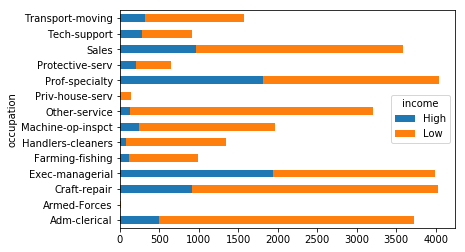

In [30]:
# Income distribution by occupation (Absolute figure)
# Top two jobs : Prof-house-serv, Exec-managerial
occu_inc.plot(kind='barh', stacked=True)

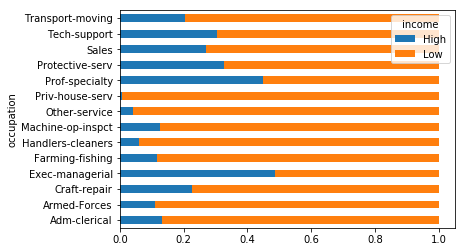

In [31]:
# Normalization in order to check ratio for comparision 
occu_inc_ratio = occu_inc.div(occu_inc.sum(1),axis=0)
occu_inc_ratio.plot(kind='barh', stacked=True) 

In [32]:
# ----- Two Graphs Interpretation -----
# 1. If you get a job in two jobs above, you are likely to have high salary
# 2. With manual work such as Priv-house-serv occupation and Handlers-cleaners, you would get have low salary

In [33]:
# Create new dataframe with two high-salary jobs
df1 = df[(df['occupation']=='Exec-managerial') | (df['occupation']=='Prof-specialty')]

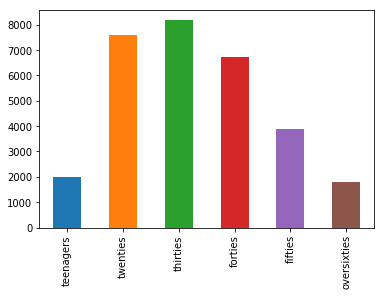

In [34]:
# The percentage of age on whole data : mainly 20 ~ 30 
df.age.value_counts().sort_index().plot(kind='bar')

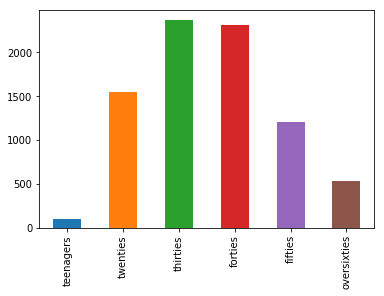

In [35]:
# The percentage of age on two high-salary jobs : mostly 30 ~ 40 
df1.age.value_counts().sort_index().plot(kind='bar')

In [36]:
# ----- Two Graphs Interpretation -----
# 1. Majority of two jobs consist of 30s and 40s 
# 2. In high-salary occupation, the number of young people is low especially teenagers
# 3. For old workers, trend in two graphes is even

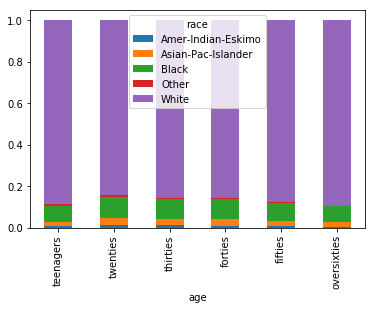

In [37]:
# Consideration of age and race based on whole occupation
df_age_race = pd.crosstab(df['age'],df['race'])
df_age_race_pct = df_age_race.div(df_age_race.sum(1), axis=0)
df_age_race_pct.plot(kind='bar', stacked=True)

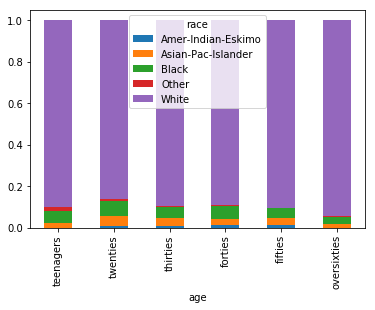

In [38]:
# Consideration of age and race based on two high-salary occupation
df1_age_race = pd.crosstab(df1['age'],df1['race'])
df1_age_race_pct = df1_age_race.div(df1_age_race.sum(1), axis=0)
df1_age_race_pct.plot(kind='bar', stacked=True) 

In [39]:
# ----- Two Graphs Interpretation -----
# 1. Gap in black is the most noticeable : I assume that it might be harder for blacks to get high-salary jobs
# 2. Asian people somehow survived better in high-salary career than I expected

In [40]:
# Race which decreased the most is black --> Let's check it with numeric figure
print (df_age_race.iloc[2:4])
print (df1_age_race.iloc[2:4])

race      Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
age                                                                  
thirties                  85                 252    784     59   6983
forties                   61                 205    643     43   5758
race      Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
age                                                                  
thirties                  16                  88    132      8   2116
forties                   25                  75    136     11   2057


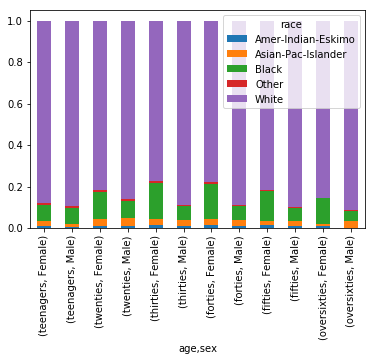

In [41]:
# Then, is there a sexual discrimiation on black?

df_sex_age_race = pd.crosstab([df['age'],df['sex']],df['race'])
df_sex_age_race.div(df_sex_age_race.sum(1), axis=0).plot(kind='bar',stacked=True)

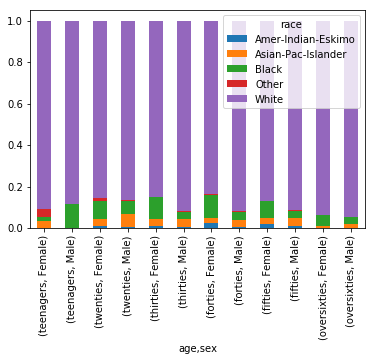

In [42]:
df1_sex_age_race = pd.crosstab([df1['age'],df1['sex']],df1['race'])
df1_sex_age_race.div(df1_sex_age_race.sum(1), axis=0).plot(kind='bar',stacked=True)

In [43]:
# ----- Two Graphs Interpretation -----
# 1. Pattern in both graphs is similar - I don't think there is a sexism
# 2. Rather the number of female is higher than one of male in two high-salary work - Ability is more important

## 2. Relationship between Sex and Education

In [44]:
edu_sex = pd.DataFrame(pd.crosstab(df['educations'],df['sex']), index=['PreSchool','ElementarySchool','MiddleSchool','HighSchool','Bachelors','Masters','Doctorate'])

Text(0.5,1,'Original Data Graph')

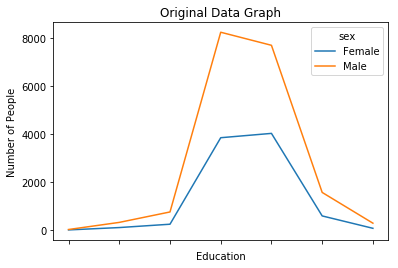

In [46]:
edu_sex.plot()
plt.xlabel('Education')
plt.ylabel('Number of People')
plt.title('Original Data Graph')

Text(0.5,1,'Normalized Data Graph')

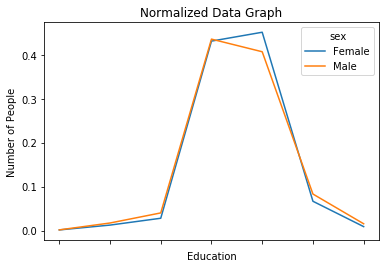

In [47]:
edu_sex.div(edu_sex.sum(0),axis=1).plot()
plt.xlabel('Education')
plt.ylabel('Number of People')
plt.title('Normalized Data Graph')

In [48]:
# ----- Two Graphs Interpretation -----
# 1. People who have highschool and bechelor diploma take the largest part
# 2. The number of female having master degree is a bit bigger than male
# 3. I don't say there is difference of education on gender

## 3. Relationship between Income and Age

In [49]:
pd.crosstab(df['income'],df['age'])

age,teenagers,twenties,thirties,forties,fifties,oversixties
income,,,,,,
High,1,660,2337,2582,1476,452
Low,1997,6939,5826,4128,2410,1354


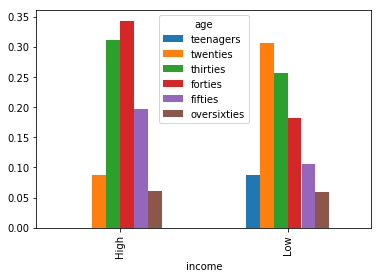

In [51]:
pd.crosstab(df['income'],df['age']).div(pd.crosstab(df['income'],df['age']).sum(1), axis=0).plot(kind='bar')

In [52]:
# ----- table and Graphs Interpretation -----
# 1. Overally low-income people are larger(50k is big money)
# 2. It's early for youngers to have high-salary job(I don't find teenager who get high-salary)
# 3. If you are 30s or 40s, you could earn money more than 50k a year(Main workers in society) 
# 4. For oversixties, the chance to get high salary is half(You need to keep your position well in your company or have competitiveness for large income)

## 4. Visualization on Education and Occupation of high earner

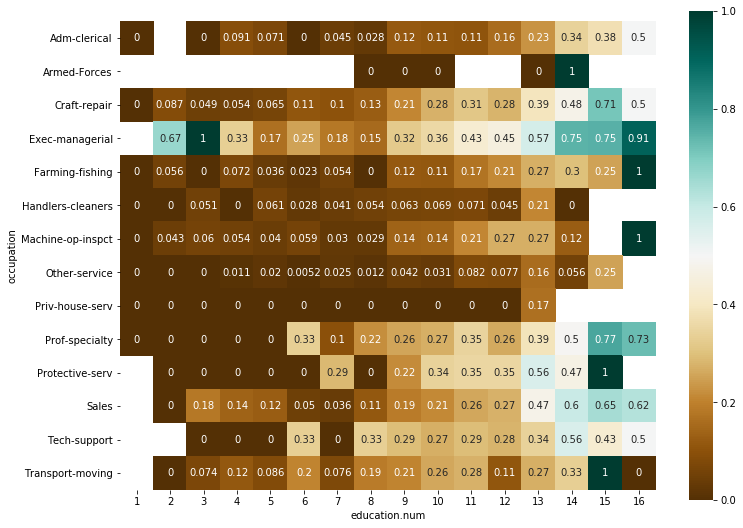

In [53]:
df_pvt = df.pivot_table('sex', index=['occupation','education.num'], columns='income', aggfunc='size')
df_pvt = df_pvt.fillna(value=0)
df_pvt.div(df_pvt.sum(1), axis=0)['High']

t = df_pvt.div(df_pvt.sum(1), axis=0)['High'].unstack()
plt.subplots(figsize=(12,9))
sns.heatmap(t, annot=True, cmap='BrBG', square=True)

In [55]:
# ----- Graphs Interpretation -----
## The possibility of getting high salary is high with the approach of 1
# 1. The better education, the higher wage regardless of types of occupation
# 2. Armed-Forces job has many blanks which has no data, which means that this job requires some education levels
# 3. Priv-house-serv does not have qualifications, but payment is still low(Maybe high-leveled education person will not apply to this job)
# 4. I indentify high numbers in Exec-managerial position even if the number of education level is low. It seems that this position would be herited by families.

## 5. Relationship between Working week and Workclass

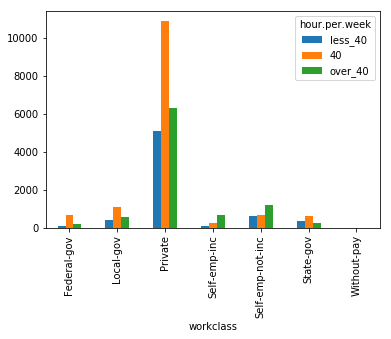

In [56]:
wc_hr = pd.crosstab(df['workclass'],df['hour.per.week'])
wc_hr.plot(kind='bar') 

In [57]:
# ----- Graphs Interpretation -----
# 1. Most of workclass of people are private
# 2. Lots of people work for 40 hours per week
# 3. People hardly provide their labor without payment 

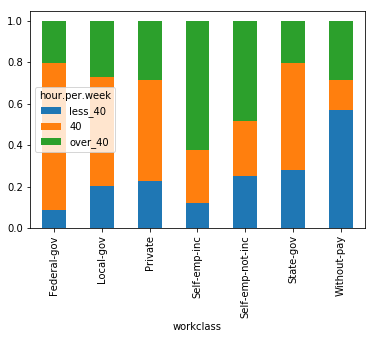

In [58]:
wc_hr.div(wc_hr.sum(1), axis=0).plot(kind='bar', stacked=True)

In [59]:
# ----- Graphs Interpretation -----
# 1. Genearlly government companies observe average office hours
# 2. Self-employees do overtime much so that they can earn more money